# Porto Seguro’s Safe Driver Prediction

### Load python packages needed for analysis

In [1]:
%pylab inline

#working with the numbers
import numpy as np
import pandas as pd
#visualization
import seaborn as sns
sns.set(style="whitegrid")
import missingno as msn
#machine learning
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
import lightgbm as lgb

#other
import gc

Populating the interactive namespace from numpy and matplotlib


### Load the datasets

In [2]:
df_train = pd.read_csv(r"input\train.csv")
df_test = pd.read_csv(r"input\test.csv")

print("Train data:")
print("Columns: {}".format(len(df_train.columns)))
print("Rows: {}". format(len(df_train)))
print("Test data:")
print("Columns: {}".format(len(df_test.columns)))
print("Rows: {}". format(len(df_test)))

Train data:
Columns: 59
Rows: 595212
Test data:
Columns: 58
Rows: 892816


In [3]:
display(df_train.head())
display(df_test.head())

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


### According to data describtion:


"*In this competition, you will predict the probability that an auto insurance policy holder files a claim.
In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix **bin** to indicate **binary features** and **cat** to indicate **categorical features**. Features without these designations are either continuous or ordinal. Values of **-1 indicate** that the feature was **missing** from the observation. The target columns signifies whether or not a claim was filed for that policy holder.*"


In [4]:
df_train.dtypes 

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

### Let's start by looking a little bit a the distribution of the data and missing entries.

In [5]:
df_train2 = df_train.replace(-1, np.NaN)
df_test2 = df_test.replace(-1, np.NaN)

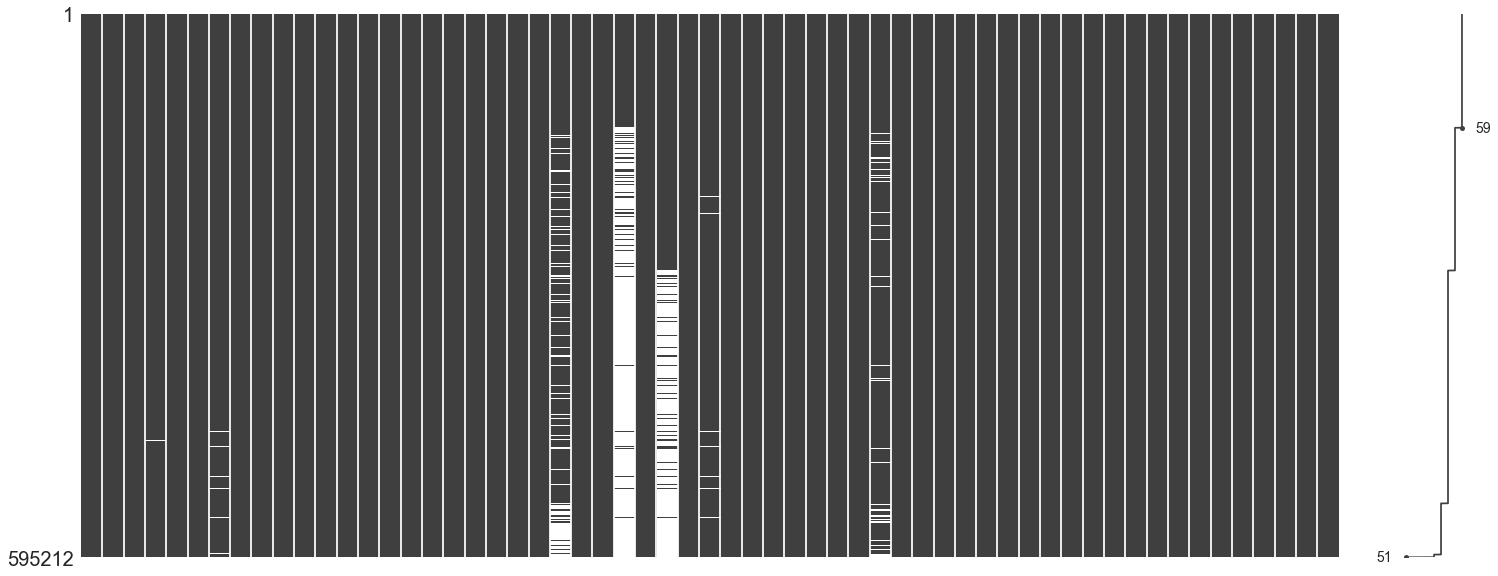

In [6]:
sorted_traindata = msn.nullity_sort(df_train2, sort='descending')
msn.matrix(sorted_traindata)

C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


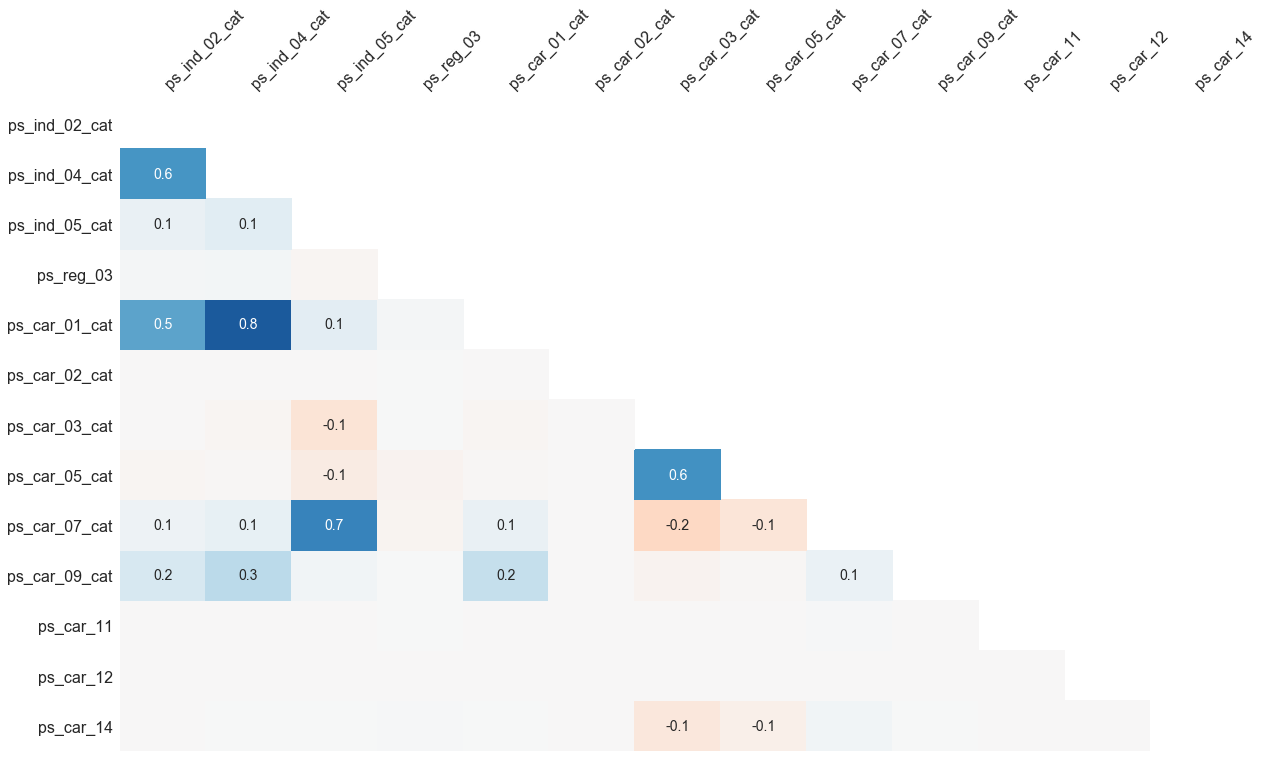

In [7]:
msn.heatmap(df_train2)

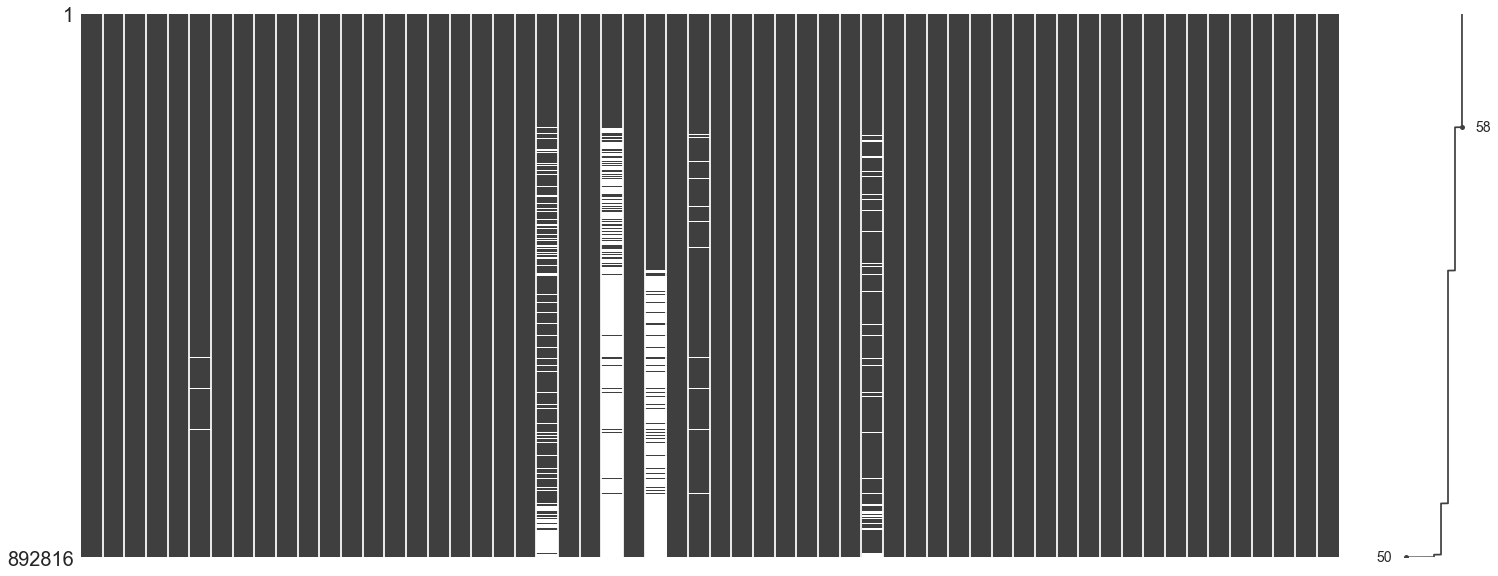

In [8]:
sorted_testdata = msn.nullity_sort(df_test2, sort='descending')
msn.matrix(sorted_testdata)

### Binary Features

In [9]:
binary_train = [c for c in df_train2.columns if c.endswith("bin")]
categorical_train = [c for c in df_train2.columns if c.endswith("cat")]

binary_test = [c for c in df_test2.columns if c.endswith("bin")]
categorical_test = [c for c in df_test2.columns if c.endswith("cat")]

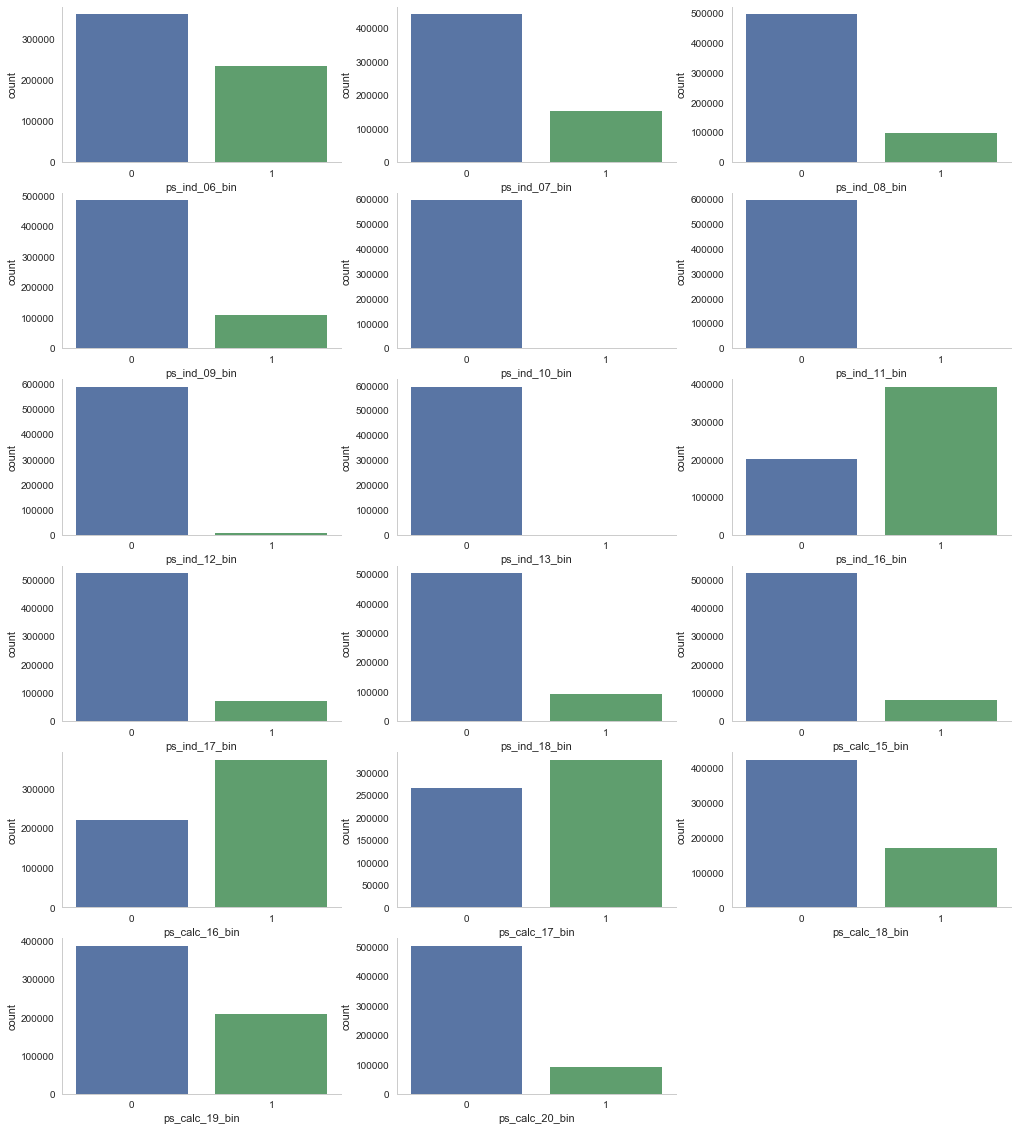

In [10]:
plt.figure(figsize=(17,20))
for i, c in enumerate(binary_train):
    ax = plt.subplot(6,3,i+1)
    sns.countplot(df_train2[c])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.grid(False)

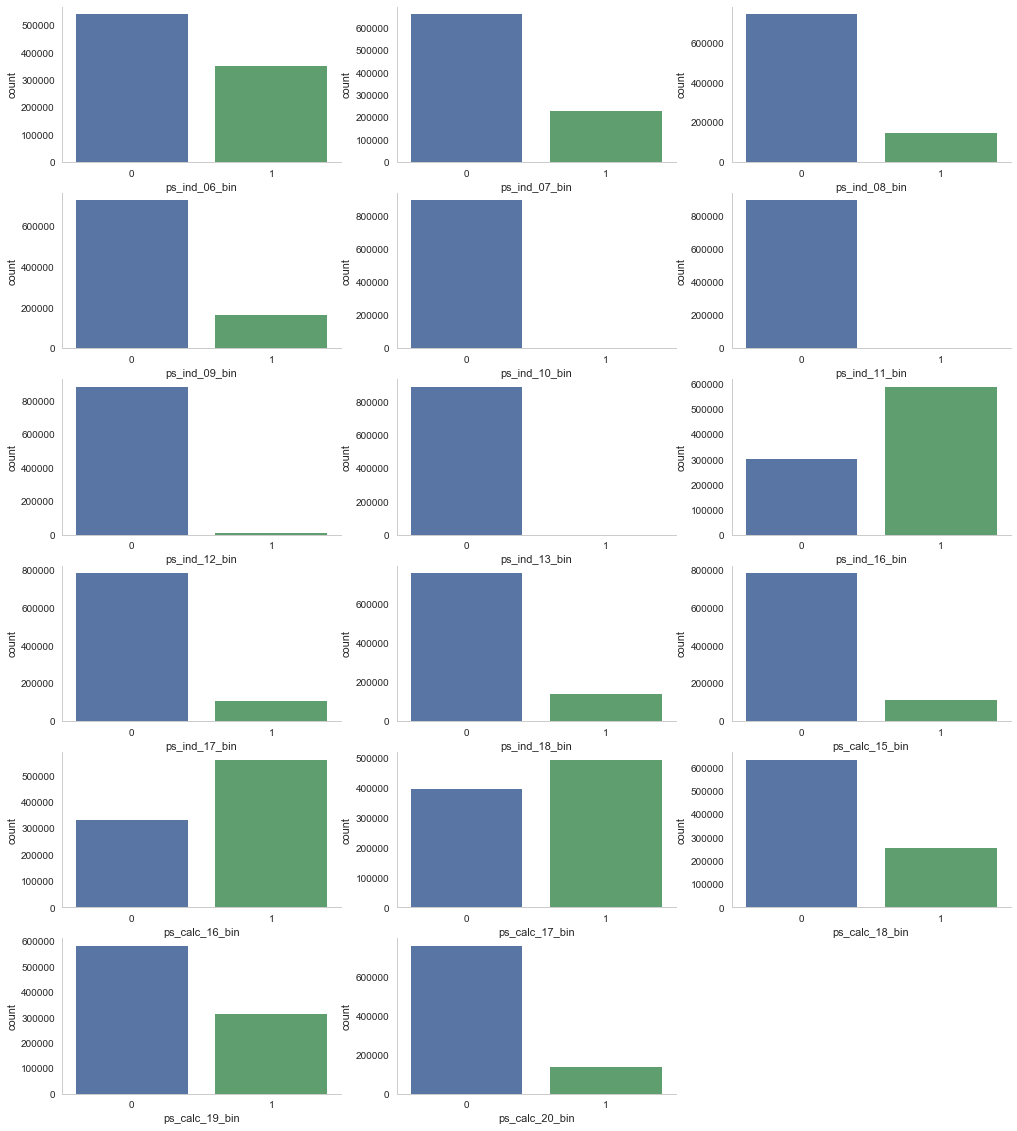

In [11]:
plt.figure(figsize=(17,20))
for i, c in enumerate(binary_test):
    ax = plt.subplot(6,3,i+1)
    sns.countplot(df_test2[c])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.grid(False)

### Categorical Features

In [12]:
print("Training Data")
for i in categorical_train:
    print(i)
    print(df_train2[i].isnull().sum())
print('\n"Test Data')   
for i in categorical_test:
    print(i)
    print(df_test2[i].isnull().sum())

Training Data
ps_ind_02_cat
216
ps_ind_04_cat
83
ps_ind_05_cat
5809
ps_car_01_cat
107
ps_car_02_cat
5
ps_car_03_cat
411231
ps_car_04_cat
0
ps_car_05_cat
266551
ps_car_06_cat
0
ps_car_07_cat
11489
ps_car_08_cat
0
ps_car_09_cat
569
ps_car_10_cat
0
ps_car_11_cat
0

"Test Data
ps_ind_02_cat
307
ps_ind_04_cat
145
ps_ind_05_cat
8710
ps_car_01_cat
160
ps_car_02_cat
5
ps_car_03_cat
616911
ps_car_04_cat
0
ps_car_05_cat
400359
ps_car_06_cat
0
ps_car_07_cat
17331
ps_car_08_cat
0
ps_car_09_cat
877
ps_car_10_cat
0
ps_car_11_cat
0


### Ok looking at the categorical features we see that the both features with the very high percentage of missing attributes are located here and are namely: ps_car_03_cat and ps_car_05_cat. I will drop them for the moment. 

In [13]:
to_drop = ["ps_car_03_cat","ps_car_05_cat"]
df_train2.drop(to_drop, axis=1, inplace=True)
df_test2.drop(to_drop, axis=1, inplace=True)
categorical_train = [i for i in categorical_train if i not in to_drop]
categorical_test = [i for i in categorical_test if i not in to_drop]

In [14]:
for i in categorical_train:
    print(i)
    print(df_train2[i].value_counts())

ps_ind_02_cat
1.0    431859
2.0    123573
3.0     28186
4.0     11378
Name: ps_ind_02_cat, dtype: int64
ps_ind_04_cat
0.0    346965
1.0    248164
Name: ps_ind_04_cat, dtype: int64
ps_ind_05_cat
0.0    528009
6.0     20662
4.0     18344
1.0      8322
3.0      8233
2.0      4184
5.0      1649
Name: ps_ind_05_cat, dtype: int64
ps_car_01_cat
11.0    207573
7.0     179247
6.0      62393
10.0     50087
4.0      26174
9.0      20323
5.0      18142
8.0      15093
3.0       6658
0.0       5904
2.0       2144
1.0       1367
Name: ps_car_01_cat, dtype: int64
ps_car_02_cat
1.0    493990
0.0    101217
Name: ps_car_02_cat, dtype: int64
ps_car_04_cat
0    496581
1     32115
2     23770
8     20598
9     19034
6      1560
3       640
5       545
4       230
7       139
Name: ps_car_04_cat, dtype: int64
ps_car_06_cat
11    131527
1     118386
0     110420
14     59253
10     33466
4      31136
15     21732
6      20951
9      17617
7      16158
3      11997
13      6246
17      4935
16      4582
12    

### The following features are only binary in the train dataset. Is this also true for test data?

In [15]:
new_bin = ["ps_ind_04_cat","ps_car_02_cat","ps_car_07_cat", "ps_car_08_cat"]
for i in new_bin:
    print(i)
    print(df_test2[i].value_counts())

ps_ind_04_cat
0.0    519899
1.0    372772
Name: ps_ind_04_cat, dtype: int64
ps_car_02_cat
1.0    740989
0.0    151822
Name: ps_car_02_cat, dtype: int64
ps_car_07_cat
1.0    829922
0.0     45563
Name: ps_car_07_cat, dtype: int64
ps_car_08_cat
1    743101
0    149715
Name: ps_car_08_cat, dtype: int64


In [16]:
binary_train.append(new_bin)
binary_test.append(new_bin)
categorical_train = [i for i in categorical_train if i not in new_bin]
categorical_test = [i for i in categorical_test if i not in new_bin]

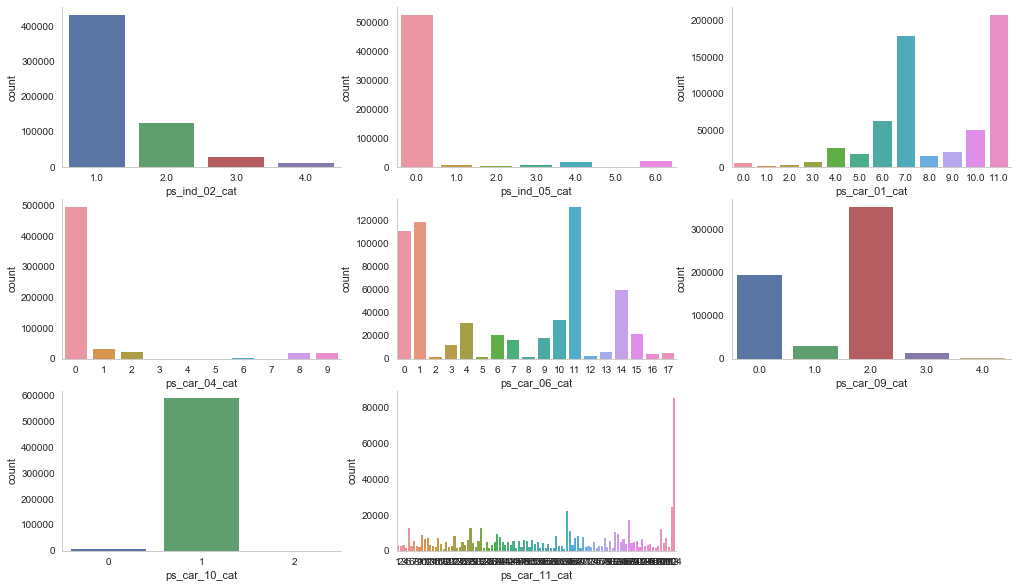

In [17]:
plt.figure(figsize=(17,10))
for i, c in enumerate(categorical_train):
    ax = plt.subplot(3,3,i+1)
    sns.countplot(df_train2[c])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.grid(False)

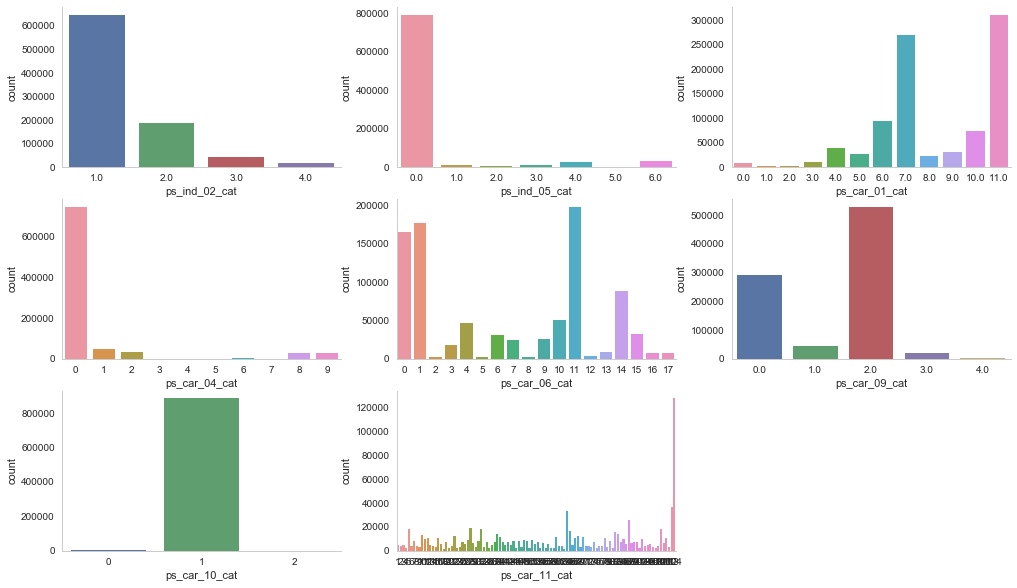

In [18]:
plt.figure(figsize=(17,10))
for i, c in enumerate(categorical_test):
    ax = plt.subplot(3,3,i+1)
    sns.countplot(df_test2[c])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.grid(False)

### Ok in a first attempt let's just impute the missing values with the most common one

In [19]:
df_train3 = df_train2.apply(lambda x:x.fillna(x.value_counts().index[0]))
df_test3 = df_test2.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [20]:
enc = OneHotEncoder()
enc.fit_transform(df_train3[categorical_train])
enc.fit_transform(df_test3[categorical_test])

<892816x163 sparse matrix of type '<class 'numpy.float64'>'
	with 7142528 stored elements in Compressed Sparse Row format>

### Continuous features

In [23]:
continuous_train = [i for i in df_train3.columns if 
                    ((i not in binary_train) and (i not in categorical_train) and (i not in ["target", "id"]))]
continuous_test = [i for i in df_test3.columns if 
                   ((i not in binary_test) and (i not in categorical_test) and (i != "id"))]

C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


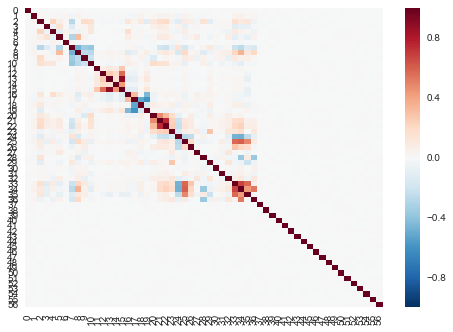

In [27]:
corr = np.corrcoef(df_train3.transpose())
sns.heatmap(corr)

C:\Users\Wegee\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\Users\Wegee\Anaconda3\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


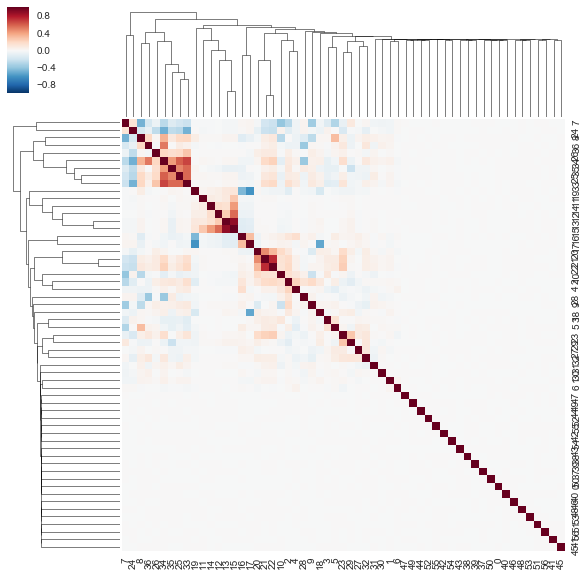

In [29]:
sns.clustermap(corr)

## To be continued... :D

In [ ]:
gc.collect()